In [2]:
from initializer import init, CSV_BASE_DIR
import pandas as pd
import numpy as np

init()

df = pd.read_csv(f'{CSV_BASE_DIR}/naver_finance/2016_12.csv')

In [3]:
# 수익률 (16.12 ~ 17.12)
df['rtn'] = df['price2'] / df['price'] - 1
df.head()

,ticker,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2,rtn
0,AK홀딩스,29218.310,7.313,4.563,1333.223,12.193,5.091,15.515,5436.413,48112.402,220556.160,10.301,1.164,0.254,56000.000,68500.000,0.223
1,BGF,860.773,9.315,214.481,1846.192,21.624,10.433,8.015,3703.577,18648.623,1737.263,22.757,4.519,48.514,42140.000,15250.000,-0.638
2,BNK금융지주,49126.760,14.499,10.546,5181.144,7.919,0.564,NaN,1568.237,20810.660,15358.993,5.535,0.417,0.565,8680.000,9420.000,0.085
3,BYC,2118.576,7.625,8.281,175.433,4.543,2.463,10.748,20872.312,471887.000,252211.450,19.020,0.841,1.574,397000.000,306000.000,-0.229
4,CJ,239541.970,5.230,2.379,5698.234,6.080,2.253,5.158,6257.152,114276.080,672045.900,28.181,1.543,0.262,176334.000,171148.000,-0.029


## Give group-number(or score) according to PER

### non-equal length partition

#### using boolean indexing & loc

In [4]:
bound1 = df['PER(배)'] >= 10
bound2 = (5 <= df['PER(배)']) & (df['PER(배)'] < 10)
bound3 = (0 <= df['PER(배)']) & (df['PER(배)'] < 5)
bound4 = df['PER(배)'] < 0

In [5]:
# Get
df.loc[bound1].head()

# Set
df.loc[bound1, 'PER_Score'] = 1
df.loc[bound2, 'PER_Score'] = 2
df.loc[bound3, 'PER_Score'] = 3
df.loc[bound4, 'PER_Score'] = -1

,ticker,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2,rtn
0,AK홀딩스,29218.310,7.313,4.563,1333.223,12.193,5.091,15.515,5436.413,48112.402,220556.160,10.301,1.164,0.254,56000.000,68500.000,0.223
1,BGF,860.773,9.315,214.481,1846.192,21.624,10.433,8.015,3703.577,18648.623,1737.263,22.757,4.519,48.514,42140.000,15250.000,-0.638
3,BYC,2118.576,7.625,8.281,175.433,4.543,2.463,10.748,20872.312,471887.000,252211.450,19.020,0.841,1.574,397000.000,306000.000,-0.229
4,CJ,239541.970,5.230,2.379,5698.234,6.080,2.253,5.158,6257.152,114276.080,672045.900,28.181,1.543,0.262,176334.000,171148.000,-0.029
5,CJ CGV,14322.454,4.911,0.393,56.217,3.105,0.284,2.919,583.051,17654.154,67682.260,120.744,3.988,1.040,70400.000,74200.000,0.054


In [6]:
df['PER_Score'].value_counts()
df['PER_Score'].shape
df[df['PER(배)'].isna()]

1.000     378
2.000     148
-1.000    120
3.000      23
Name: PER_Score, dtype: int64

(681,)

,ticker,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2,rtn,PER_Score
27,HSD엔진,8029.166,0.528,-22.571,-1812.265,-32.685,-13.120,2.749,-2607.575,7687.264,11552.757,NaN,0.404,NaN,2290.000,2569.000,0.122,NaN
103,고려개발,6238.648,4.223,-4.895,-305.362,141.454,-4.903,20.462,-3118.716,1988.392,63716.438,NaN,6.327,NaN,12430.000,11659.000,-0.062,NaN
126,까뮤이앤씨,1397.081,3.180,2.331,32.563,6.721,2.390,7.808,72.117,1153.474,3094.153,NaN,0.958,NaN,1105.000,1010.000,-0.086,NaN
133,남영비비안,2074.953,-0.949,-1.103,-22.895,-1.667,-1.371,-2.101,-32.324,2031.729,3021.213,NaN,0.436,NaN,885.000,777.000,-0.122,NaN
203,티탑스,940.880,-7.061,-4.217,-39.673,-8.980,-4.092,NaN,-1917.146,19287.736,44614.258,NaN,0.058,NaN,1115.000,1575.000,0.413,NaN
231,롯데칠성음료,22642.120,6.463,3.054,691.439,2.961,1.531,3.109,5107.448,172911.200,166829.270,NaN,8.363,NaN,145675.000,132900.000,-0.088,NaN
371,쌍용양회공업,14302.892,18.027,12.243,1751.111,11.589,5.694,9.037,400.919,3627.562,3319.079,NaN,0.816,NaN,2960.000,3730.000,0.260,NaN
507,컨버즈,459.748,-19.328,-35.526,-163.331,NaN,NaN,NaN,-33811.426,20164.525,95172.870,NaN,0.397,NaN,4416.000,1750.000,-0.604,NaN
560,풀무원,20306.730,1.869,0.491,99.778,6.765,0.979,1.933,4881.663,6986.189,533111.700,NaN,2.011,NaN,14050.000,17200.000,0.224,NaN
622,한일철강,1112.614,5.475,4.236,47.131,3.405,1.467,4.510,249.431,8408.528,5453.988,NaN,0.297,NaN,2500.000,2645.000,0.058,NaN


In [7]:
# df['PER_Score'] = df['PER_Score'].fillna(0)
df.loc[df['PER(배)'].isna(), 'PER_Score'] = 0
df.head()

,ticker,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2,rtn,PER_Score
0,AK홀딩스,29218.310,7.313,4.563,1333.223,12.193,5.091,15.515,5436.413,48112.402,220556.160,10.301,1.164,0.254,56000.000,68500.000,0.223,1.000
1,BGF,860.773,9.315,214.481,1846.192,21.624,10.433,8.015,3703.577,18648.623,1737.263,22.757,4.519,48.514,42140.000,15250.000,-0.638,1.000
2,BNK금융지주,49126.760,14.499,10.546,5181.144,7.919,0.564,NaN,1568.237,20810.660,15358.993,5.535,0.417,0.565,8680.000,9420.000,0.085,2.000
3,BYC,2118.576,7.625,8.281,175.433,4.543,2.463,10.748,20872.312,471887.000,252211.450,19.020,0.841,1.574,397000.000,306000.000,-0.229,1.000
4,CJ,239541.970,5.230,2.379,5698.234,6.080,2.253,5.158,6257.152,114276.080,672045.900,28.181,1.543,0.262,176334.000,171148.000,-0.029,1.000


In [8]:
# boolean series의 연산 특성 사용
df.loc[:, 'PER_Score_1'] = (bound1 * 1) + (bound2 * 2) + (bound3 * 3) + (bound4 * -1)
df['PER_Score_1'].head()
df['PER_Score_1'].value_counts()

0    1
1    1
2    2
3    1
4    1
Name: PER_Score_1, dtype: int64

 1    378
 2    148
-1    120
 3     23
 0     12
Name: PER_Score_1, dtype: int64

In [9]:
# cut()

per_cuts = pd.cut(
    df['PER(배)'],
    [-np.inf, 0, 5, 10, np.inf]
)

per_cuts.head()
per_cuts.value_counts()

0    (10.0, inf]
1    (10.0, inf]
2    (5.0, 10.0]
3    (10.0, inf]
4    (10.0, inf]
Name: PER(배), dtype: category
Categories (4, interval[float64, right]): [(-inf, 0.0] < (0.0, 5.0] < (5.0, 10.0] < (10.0, inf]]

(10.0, inf]    378
(5.0, 10.0]    148
(-inf, 0.0]    120
(0.0, 5.0]      23
Name: PER(배), dtype: int64

In [10]:
# cut() with labeling
bounds = [-np.inf, 10, 20, np.inf]
labels = ['저평가주', '보통주', '고평가주']
per_cuts_2 = pd.cut(df['PER(배)'], bins=bounds, labels=labels)
per_cuts_2.head()

0     보통주
1    고평가주
2    저평가주
3     보통주
4    고평가주
Name: PER(배), dtype: category
Categories (3, object): ['저평가주' < '보통주' < '고평가주']

In [11]:
df.loc[:, 'PER_Score_2'] = per_cuts_2
df.head()

,ticker,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2,rtn,PER_Score,PER_Score_1,PER_Score_2
0,AK홀딩스,29218.310,7.313,4.563,1333.223,12.193,5.091,15.515,5436.413,48112.402,220556.160,10.301,1.164,0.254,56000.000,68500.000,0.223,1.000,1,보통주
1,BGF,860.773,9.315,214.481,1846.192,21.624,10.433,8.015,3703.577,18648.623,1737.263,22.757,4.519,48.514,42140.000,15250.000,-0.638,1.000,1,고평가주
2,BNK금융지주,49126.760,14.499,10.546,5181.144,7.919,0.564,NaN,1568.237,20810.660,15358.993,5.535,0.417,0.565,8680.000,9420.000,0.085,2.000,2,저평가주
3,BYC,2118.576,7.625,8.281,175.433,4.543,2.463,10.748,20872.312,471887.000,252211.450,19.020,0.841,1.574,397000.000,306000.000,-0.229,1.000,1,보통주
4,CJ,239541.970,5.230,2.379,5698.234,6.080,2.253,5.158,6257.152,114276.080,672045.900,28.181,1.543,0.262,176334.000,171148.000,-0.029,1.000,1,고평가주


#### Same number of members in each group

##### `qcut` (quantile)

In [12]:
pd.qcut(df['PER(배)'], 3, labels=[1,2,3]) # 정규분포표(편의상) 상 면적을 3등분

0      2
1      3
2      1
3      3
4      3
      ..
676    3
677    1
678    3
679    1
680    1
Name: PER(배), Length: 681, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [13]:
df.loc[:, 'PER_Score_3'] = pd.qcut(df['PER(배)'], 10, labels=range(1,11))
df['PER_Score_3'].value_counts()
df = df.dropna(subset=['PER_Score_3'])
df['PER_Score_3'].hasnans

1     67
2     67
3     67
4     67
5     67
7     67
8     67
9     67
10    67
6     66
Name: PER_Score_3, dtype: int64

False

### Split, Apply, Combine

In [14]:
df = pd.read_csv(f'{CSV_BASE_DIR}/naver_finance/2016_12.csv')
df = df.dropna()
global_df = df.copy()

In [15]:
global_df['rtn'] = global_df['price2'] / global_df['price'] - 1
global_df.loc[:, 'PER_score'] = pd.qcut(global_df['PER(배)'], 10, labels=range(1, 11))
global_df.loc[:, 'PBR_score'] = pd.qcut(global_df['PBR(배)'], 10, labels=range(1, 11))
global_df.set_index('ticker', inplace=True)
global_df.head()

,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2,rtn,PER_score,PBR_score
ticker,,,,,,,,,,,,,,,,,,
AK홀딩스,29218.310,7.313,4.563,1333.223,12.193,5.091,15.515,5436.413,48112.402,220556.160,10.301,1.164,0.254,56000.000,68500.000,0.223,5,7
BGF,860.773,9.315,214.481,1846.192,21.624,10.433,8.015,3703.577,18648.623,1737.263,22.757,4.519,48.514,42140.000,15250.000,-0.638,8,10
BYC,2118.576,7.625,8.281,175.433,4.543,2.463,10.748,20872.312,471887.000,252211.450,19.020,0.841,1.574,397000.000,306000.000,-0.229,8,5
CJ,239541.970,5.230,2.379,5698.234,6.080,2.253,5.158,6257.152,114276.080,672045.900,28.181,1.543,0.262,176334.000,171148.000,-0.029,9,8
CJ CGV,14322.454,4.911,0.393,56.217,3.105,0.284,2.919,583.051,17654.154,67682.260,120.744,3.988,1.040,70400.000,74200.000,0.054,10,10


### `groupby` & Aggregation

- `groupby`
    - 실제로 grouping이 가능한지 validation(preparation)
- Aggregation
    - aggregating columns
    - aggregating functions
        - e.g. `sum`, `min`, `max`, `mean`, `count`, `variance`, `std`, etc.
- 결국 3가지 요소만 충족하면 가능
        - Grouping columns (categorial data type)
        - Aggregating columns
        - Aggregating functions

#### Examining the groupby object

In [16]:
global_df.groupby('PER_score')
tmp = global_df.groupby(['PER_score', 'PBR_score'])
tmp.ngroups
tmp.size().to_frame()

96

0
PER_score PBR_score    
1         1           5
          2           6
          3           0
          4           5
          5           7
...                  ..
10        6           2
          7           8
          8           6
          9           7
          10         14

[100 rows x 1 columns]

In [17]:
tmp.groups.keys()
tmp.get_group((1, 1)).head(2)

dict_keys([(1, 1), (1, 2), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (9, 10), (10, 1), (10, 2), (10, 3), (10, 4), (10, 5), (10, 6), (10, 7), (10, 8), (10, 9), (10, 10)])

,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2,rtn,PER_score,PBR_score
ticker,,,,,,,,,,,,,,,,,,
E1,39959.008,0.277,-0.949,-379.397,-2.350,-1.076,-1.633,-3869.011,191789.690,582492.800,-16.206,0.327,0.108,62700.000,56900.000,-0.093,1,1
S&T중공업,4680.078,-0.309,-5.221,-244.358,-3.671,-2.697,-0.791,-734.851,21043.785,14074.280,-12.369,0.432,0.646,9089.000,7310.000,-0.196,1,1


### aggregation

In [21]:
pbr_rtn_df = global_df.groupby('PBR_score').agg({'rtn': 'mean'})
per_rtn_df = global_df.groupby('PER_score').agg({'rtn': 'mean'})

In [25]:
global_df.groupby('PBR_score')['rtn'].agg('mean').head()
global_df.groupby('PBR_score')[['rtn']].agg('mean').head()
global_df.groupby('PBR_score')['rtn'].agg(np.mean).head()

PBR_score
1   -0.001
2    0.020
3   -0.021
4    0.161
5   -0.012
Name: rtn, dtype: float64

,rtn
PBR_score,
1,-0.001
2,0.020
3,-0.021
4,0.161
5,-0.012


PBR_score
1   -0.001
2    0.020
3   -0.021
4    0.161
5   -0.012
Name: rtn, dtype: float64

,rtn,PBR(배)
PBR_score,,
1,-0.001,0.355
2,0.020,0.519
3,-0.021,0.627
4,0.161,0.751
5,-0.012,0.889


In [28]:
global_df.groupby('PBR_score')[['rtn', 'PBR(배)']].agg(np.mean).head()
global_df.groupby('PBR_score')[['rtn', 'PBR(배)']].agg(['mean', 'std']).head()
global_df.groupby('PBR_score')[['rtn', 'PBR(배)']].agg(
    {
        'rtn': ['mean', 'std'],
        'PBR(배)': ['min', 'max']
    }
).head()

,rtn,PBR(배)
PBR_score,,
1,-0.001,0.355
2,0.020,0.519
3,-0.021,0.627
4,0.161,0.751
5,-0.012,0.889


rtn       PBR(배)      
            mean   std   mean   std
PBR_score                          
1         -0.001 0.262  0.355 0.121
2          0.020 0.280  0.519 0.029
3         -0.021 0.219  0.627 0.034
4          0.161 0.770  0.751 0.040
5         -0.012 0.265  0.889 0.043

rtn       PBR(배)      
            mean   std    min   max
PBR_score                          
1         -0.001 0.262 -0.238 0.463
2          0.020 0.280  0.464 0.566
3         -0.021 0.219  0.570 0.684
4          0.161 0.770  0.685 0.813
5         -0.012 0.265  0.813 0.971

<AxesSubplot:xlabel='PER_score'>

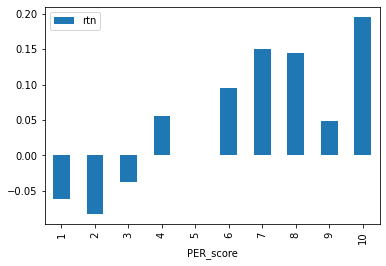

In [29]:
per_rtn_df.plot(kind='bar')

### Example

In [30]:
g_df = global_df\
    .groupby(['PBR_score', 'PER_score'])\
    .agg({
        'rtn': ['mean', 'std', 'min', 'max'],
        'ROE(%)': [np.mean, 'size', 'nunique', 'idxmax']
    })

In [31]:
g_df.head()

rtn                     ROE(%)                       
                      mean   std    min   max    mean size nunique    idxmax
PBR_score PER_score                                                         
1         1         -0.100 0.072 -0.196 0.003  -1.402    5       5  한국수출포장공업
          2         -0.093 0.266 -0.482 0.437 154.967   11      11      삼부토건
          3          0.117 0.359 -0.556 0.683   6.952   11      11    한국전력공사
          4          0.106 0.295 -0.273 0.882   5.104   11      11      한국공항
          5         -0.039 0.120 -0.206 0.113   3.941    7       7    성창기업지주

In [33]:
tmp = global_df.groupby(['PBR_score', 'PER_score'])['rtn', 'ROE(%)'].agg(['sum', 'mean'])

/var/folders/19/zmm26ll95zb7drffrjsdx8_h0000gn/T/ipykernel_51705/3478514270.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tmp = global_df.groupby(['PBR_score', 'PER_score'])['rtn', 'ROE(%)'].agg(['sum', 'mean'])


In [34]:
tmp.loc[1]
tmp.loc[(1, 3)]
tmp.loc[[(1, 3)]]

rtn          ROE(%)        
             sum   mean      sum    mean
PER_score                               
1         -0.499 -0.100   -7.009  -1.402
2         -1.025 -0.093 1704.634 154.967
3          1.290  0.117   76.477   6.952
4          1.165  0.106   56.146   5.104
5         -0.275 -0.039   27.590   3.941
6         -0.666 -0.333    6.710   3.355
7         -0.126 -0.031   11.435   2.859
8          0.000    NaN    0.000     NaN
9         -0.175 -0.058    3.039   1.013
10         0.226  0.032    2.873   0.410

rtn     sum     1.290
        mean    0.117
ROE(%)  sum    76.477
        mean    6.952
Name: (1, 3), dtype: float64

rtn       ROE(%)      
                      sum  mean    sum  mean
PBR_score PER_score                         
1         3         1.290 0.117 76.477 6.952

> NaN은 groupby 시 자동으로 filter out 되기 때문에 미리 전처리 하는 것이 좋음

In [36]:
tmp = pd.DataFrame({
    'a': ['소형주', np.nan, '대형주', '대형주'],
    'b': [np.nan, 2, 3, np.nan]
})
tmp

,a,b
0,소형주,NaN
1,NaN,2.000
2,대형주,3.000
3,대형주,NaN


In [37]:
# 평균을 구할 때 NaN을 제외한 값으로 계산한다.
tmp.groupby(['a'])['b'].mean()

a
대형주   3.000
소형주     NaN
Name: b, dtype: float64

In [43]:
# as_index: group 열들이 index가 아니라 하나의 col이 됨(aggregate 하고 reset_inde()를 취한 형태)
a = global_df.groupby(['PER_score']).agg({'rtn': ['mean', 'std']})
b = global_df.groupby(['PER_score'], as_index=False).agg({'rtn': ['mean', 'std']})

In [44]:
a # PER_score가 index
b # PER_score가 index 아님

rtn      
            mean   std
PER_score             
1         -0.062 0.328
2         -0.083 0.781
3         -0.038 0.286
4          0.056 0.308
5          0.000 0.206
6          0.095 0.403
7          0.151 0.648
8          0.144 0.545
9          0.048 0.478
10         0.196 0.479

PER_score    rtn      
              mean   std
0         1 -0.062 0.328
1         2 -0.083 0.781
2         3 -0.038 0.286
3         4  0.056 0.308
4         5  0.000 0.206
5         6  0.095 0.403
6         7  0.151 0.648
7         8  0.144 0.545
8         9  0.048 0.478
9        10  0.196 0.479

In [47]:
a.index
b.index

a.columns
b.columns

CategoricalIndex([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], categories=[1, 2, 3, 4, 5, 6, 7, 8, ...], ordered=True, dtype='category', name='PER_score')

RangeIndex(start=0, stop=10, step=1)

MultiIndex([('rtn', 'mean'),
            ('rtn',  'std')],
           )

MultiIndex([('PER_score',     ''),
            (      'rtn', 'mean'),
            (      'rtn',  'std')],
           )

In [48]:
# squash the multi-index columns
g_df.head()

rtn                     ROE(%)                       
                      mean   std    min   max    mean size nunique    idxmax
PBR_score PER_score                                                         
1         1         -0.100 0.072 -0.196 0.003  -1.402    5       5  한국수출포장공업
          2         -0.093 0.266 -0.482 0.437 154.967   11      11      삼부토건
          3          0.117 0.359 -0.556 0.683   6.952   11      11    한국전력공사
          4          0.106 0.295 -0.273 0.882   5.104   11      11      한국공항
          5         -0.039 0.120 -0.206 0.113   3.941    7       7    성창기업지주

In [49]:
level_0 = g_df.columns.get_level_values(0)
level_1 = g_df.columns.get_level_values(1)

level_0
level_1

Index(['rtn', 'rtn', 'rtn', 'rtn', 'ROE(%)', 'ROE(%)', 'ROE(%)', 'ROE(%)'], dtype='object')

Index(['mean', 'std', 'min', 'max', 'mean', 'size', 'nunique', 'idxmax'], dtype='object')

In [50]:
g_df.columns = level_0 + '_' + level_1
g_df.head()

rtn_mean  rtn_std  rtn_min  rtn_max  ROE(%)_mean  \
PBR_score PER_score                                                     
1         1            -0.100    0.072   -0.196    0.003       -1.402   
          2            -0.093    0.266   -0.482    0.437      154.967   
          3             0.117    0.359   -0.556    0.683        6.952   
          4             0.106    0.295   -0.273    0.882        5.104   
          5            -0.039    0.120   -0.206    0.113        3.941   

                     ROE(%)_size  ROE(%)_nunique ROE(%)_idxmax  
PBR_score PER_score                                             
1         1                    5               5      한국수출포장공업  
          2                   11              11          삼부토건  
          3                   11              11        한국전력공사  
          4                   11              11          한국공항  
          5                    7               7        성창기업지주

In [51]:
g_df = g_df.reset_index()
g_df.head()

,PBR_score,PER_score,rtn_mean,rtn_std,rtn_min,rtn_max,ROE(%)_mean,ROE(%)_size,ROE(%)_nunique,ROE(%)_idxmax
0,1,1,-0.100,0.072,-0.196,0.003,-1.402,5,5,한국수출포장공업
1,1,2,-0.093,0.266,-0.482,0.437,154.967,11,11,삼부토건
2,1,3,0.117,0.359,-0.556,0.683,6.952,11,11,한국전력공사
3,1,4,0.106,0.295,-0.273,0.882,5.104,11,11,한국공항
4,1,5,-0.039,0.120,-0.206,0.113,3.941,7,7,성창기업지주


## 실전 예제

### 시가총액으로 Small / Big 구분하기

In [53]:
df = pd.read_csv(f'{CSV_BASE_DIR}/Small_and_Big.csv', index_col=[0])
df.head()
df.tail()

,date,종목명,PBR(IFRS-연결),"베타 (M,5Yr)",수익률(%),시가총액 (보통)(평균)(원)
0,2000-07-31,BYC,0.210,0.479,-0.580,27786000000.000
1,2000-07-31,CJ,0.510,1.166,-9.000,1160889000000.000
2,2000-07-31,CJ ENM,6.560,NaN,17.400,400467000000.000
3,2000-07-31,CJ대한통운,0.170,1.314,-7.960,194962000000.000
4,2000-07-31,CJ씨푸드,NaN,0.227,32.000,1987000000.000


,date,종목명,PBR(IFRS-연결),"베타 (M,5Yr)",수익률(%),시가총액 (보통)(평균)(원)
235924,2018-06-30,흥국에프엔비,0.950,1.364,-1.690,64926000000.000
235925,2018-06-30,흥국화재,0.650,0.721,8.890,383175000000.000
235926,2018-06-30,흥아해운,0.920,1.240,-5.750,134473000000.000
235927,2018-06-30,희림,1.390,0.216,2.230,86250000000.000
235928,2018-06-30,힘스,1.420,NaN,-15.820,82748000000.000


In [58]:
median_df = df.groupby(['date']).agg({'시가총액 (보통)(평균)(원)': 'median'})
median_df.head()

,시가총액 (보통)(평균)(원)
date,
2000-07-31,34947000000.000
2000-08-31,33684000000.000
2000-09-30,33684000000.000
2000-10-31,30523000000.000
2000-11-30,30798000000.000
